# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt

#  Creación de la red

Creamos la red como una lista de enlaces, donde cada enlace tiene el atributo weight que indica que tan fuerte es la amistad en una escala de 1 a 3

In [2]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red y la guardamos en la variable G

In [3]:
G = nx.Graph(lista_enlaces)

## Dibujamos la red

Dubujamos la red con los nodos en colo cyan y mostrando las etiquetas de los nodos

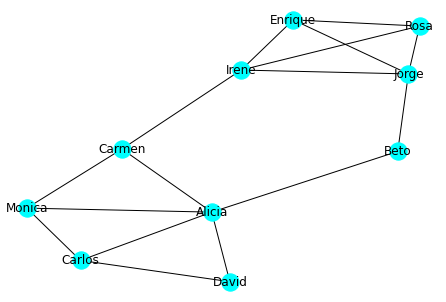

In [4]:
nx.draw(G,with_labels=True,node_color="cyan")

Con el uso de la librería matplotlib (que importamos como plt) guardamos la imagen generada como amigos.png

In [5]:
plt.savefig("amigos.png")

<Figure size 432x288 with 0 Axes>

# Informacion de la red
El siguiente codigo calcula la cantidad de nodos, enlaces y el diámetro de la red. Almacena estos dato en las variables n, m y d, repectivamente. Posteriormente se imprime la información

In [6]:
# nodos
n = len(nx.nodes(G))
# enlaces
m = len(nx.edges(G))
# diametro
d = nx.diameter(G)
print("Informacion de la red: \n- nodos = " + str(n) +
      "\n- enlaces = " + str(m) +
      "\n- diámetro = " + str(d) )

Informacion de la red: 
- nodos = 10
- enlaces = 16
- diámetro = 4


Los anteriores datos se pueden obtener usando la función info de networkx

In [13]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10\nNumber of edges: 16\nAverage degree:   3.2000'

**ACTIVIDAD 1** Cree una función que reciba como parametro una red. La función debe: 1) dibujar la red con los nodos en color gris y mostrando sus etiquetas, 2) guardar la imagen en el archivo red.png y 3) Imprimir la información de la red

In [14]:
def DrawSavePrint(G):
    nx.draw(G,with_labels=True,node_color="gray")
    plt.savefig("red.png")
    print(nx.info(G))

**ACTIVIDAD 2** Llame a la función anterior pasandole como parmatero la red que creo

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 16
Average degree:   3.2000


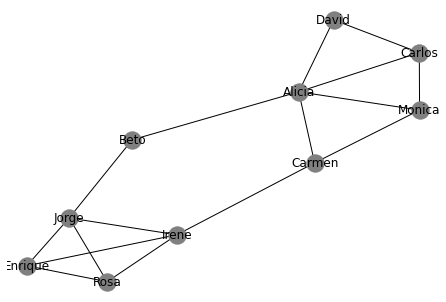

In [15]:
DrawSavePrint(G)

# Grado nodal
Indica el número de enlaces de un nodo

In [26]:
# Funcion para calcular la cantidad de amigos de un nodo
def num_amigos(nodo):
    amigos = nx.degree(G,nodo)
    print(str(nodo) + " tiene " + str(amigos) + " amigos")
    return amigos

Calculamos la cantidad de amigos de Alicia y los muestra

In [27]:
amigos_alicia = num_amigos("Alicia")
amigos_alicia

Alicia tiene 5 amigos


5

Calculamos los amigos de Rosa

In [28]:
amigos_rosa = num_amigos("Rosa")
amigos_rosa

Rosa tiene 3 amigos


3

**ACTIVIDAD 3** Usando un ciclo for, itere todos los nodos de la red G y para cada uno de ellos llame a la función num_amigos

In [17]:
for nodo in G:
    amigos= nx.degree(G,nodo)
    print(str(nodo)+" tiene "+str(amigos)+" amigos ")

Alicia tiene 5 amigos 
Beto tiene 2 amigos 
Carlos tiene 3 amigos 
David tiene 2 amigos 
Carmen tiene 3 amigos 
Monica tiene 3 amigos 
Jorge tiene 4 amigos 
Enrique tiene 3 amigos 
Rosa tiene 3 amigos 
Irene tiene 4 amigos 


## Distribucion de grados

Calculamos la distribución de grados

In [29]:
dist_grados = nx.degree_histogram(G)
print(dist_grados)

[0, 0, 2, 5, 2, 1]


El resultado anterior nos indica que hay

- 0 nodos de grado 0
- 0 nodos de grado 1
- 2 nodos de grado 2
- 5 nodos de grado 3
- 2 nodos de grado 2
- 1 nodo de grado 1

El siguiente código permite gráficar la distribucion de grados obtenida y la guarda en la imagen distribucion.png

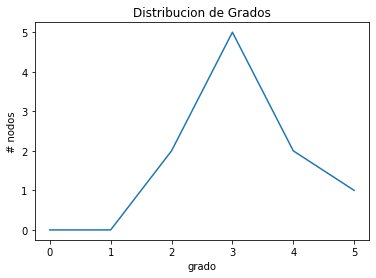

In [18]:
plt.title("Distribucion de Grados")
plt.plot(dist_grados) 
plt.xlabel("grado")
plt.ylabel("# nodos")
plt.savefig("distribucion.png")

**ACTIVIDAD 4** Cree una función que se llame graficar_distr_grado, la función debe recibir como parámetro una red G. La función calcula la distribución de grados, la grafica y la almacena en una imágen dist_grado.png. Finalmente la función devuelve la lista que almacena la distribución de grado

In [19]:
def graficar_distr_grado(G):
    dist_grados=nx.degree_histogram(G)
    plt.title("Distribución de grados")
    plt.plot(dist_grados)
    plt.xlabel("grado")
    plt.ylabel("N. de nodos")
    plt.savefig("dist_grado.png")

**ACTIVIDAD 5** Llame a la función anterior pasandole como parámetro la gráfica G

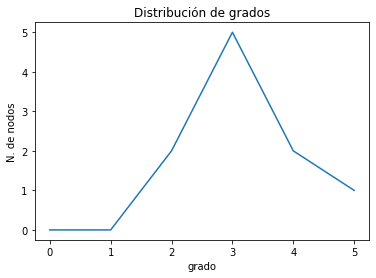

In [20]:
graficar_distr_grado(G)

## Grado promedio de la red

**ACTIVIDAD 6** Cree una función que se llame grado_promedio de la red, la función debe recibir como parámetro una red G. La función calcula el grado promedio de la red, lo imprime y lo devuleve

In [67]:
def grado_promedio(G):
    n_enlaces=nx.number_of_edges(G)
    n_nodos=nx.number_of_nodes(G)
    grado_promedio_red=n_enlaces*2/n_nodos
    print("El grado promedio de la red es: "+str(grado_promedio_red))

**ACTIVIDAD 7** Llame a la función anterior pasandole como parámetro la gráfica G

In [68]:
grado_promedio(G)

El grado promedio de la red es: 3.2


# Densidad de la red
Proporcion de nodos que tiene con respecto a los que podría tener (es decir los que tiene la red completa)

## Red completa

Usando NetworkX creamos una red completa de 10 nodos (recuerde que la variable n se declaro más arriba guarda el numero 10) y la almacena en la variable Kn

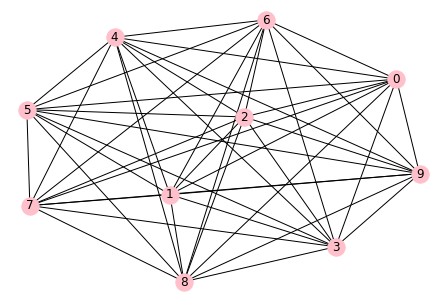

In [70]:
kn = nx.complete_graph(n)
nx.draw(kn,with_labels=True,node_color="pink")
#plt.savefig("amigos.png")

 **ACTIVIDAD 8** Calcule la densidad de la red G de 10 nodos usando la red Kn que acaba de crear

In [72]:
densidad= nx.density(kn)
print("La densidad de la red kn es: "+str(densidad))

La densidad de la red kn es: 1.0


Calculamos la densidad usando NetworkX

In [73]:
densidad = nx.density(G)
print("La densidad de la red es " + str(densidad))

La densidad de la red es 0.35555555555555557
